<IPython.core.display.Javascript object>


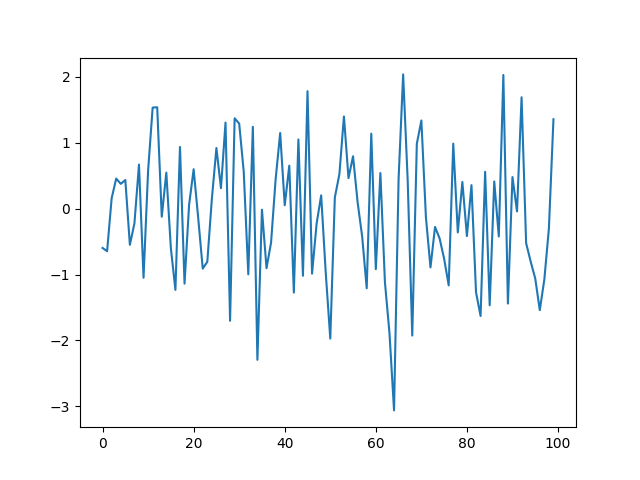

In [13]:
%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,10):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

<IPython.core.display.Javascript object>


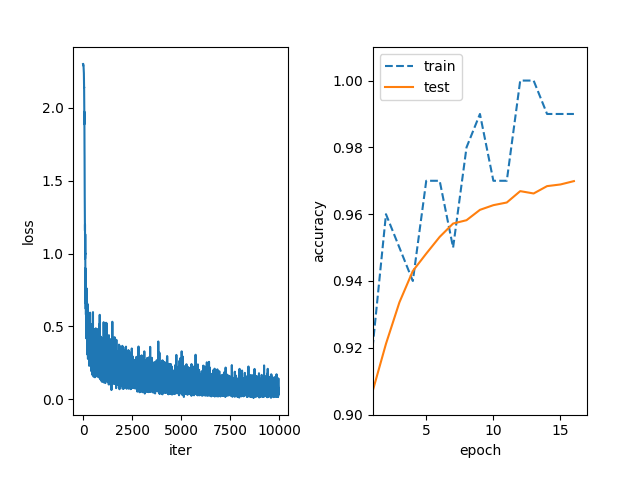

iter	train_acc	test_acc	loss			time
    0	    16.0%	   11.36%	2.301287451863893	0.101s
  600	    92.0%	   90.69%	0.27273663350729166	3.374s
 1200	    96.0%	   92.12%	0.24616721997113789	3.375s
 1800	    95.0%	   93.36%	0.15645457498601956	3.311s
 2400	    94.0%	    94.3%	0.131820102698283	3.409s
 3000	    97.0%	   94.82%	0.07549413639903549	3.356s
 3600	    97.0%	   95.32%	0.11111918812057019	3.409s
 4200	    95.0%	   95.72%	0.16548386184231753	3.45s
 4800	    98.0%	   95.82%	0.07295676914775794	3.391s
 5400	    99.0%	   96.13%	0.07179305677303154	3.427s
 6000	    97.0%	   96.27%	0.08075713393299391	3.405s
 6600	    97.0%	   96.35%	0.09440413271500141	3.489s
 7200	   100.0%	   96.69%	0.02319332077067609	3.448s
 7800	   100.0%	   96.62%	0.051086755988390825	3.471s
 8400	    99.0%	   96.84%	0.04516106052080315	3.454s
 9000	    99.0%	   96.89%	0.044371843817130864	3.465s
 9600	    99.0%	   96.99%	0.03449381439951745	3.528s
경과시간 : 57.172초


In [64]:
import numpy as np
import mnist
from two_layer_nn import TwoLayerNet

np.random.seed(0)

dataset = mnist.load(normalize=True, one_hot_label=True)
network = TwoLayerNet(784, 50, 10)

iters_num = 10000
train_size = dataset["train_img"].shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)  # 600
from time import time

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)


plt.tight_layout(pad=3, w_pad=3, h_pad=3)
plt.ion()

fig.show()
fig.canvas.draw()

print("iter\ttrain_acc\ttest_acc\tloss\t\t\ttime")
start = time()
start2 = time()
for i in range(iters_num):
    mask = np.random.choice(train_size, batch_size)
    x = dataset["train_img"][mask]
    t = dataset["train_label"][mask]
    
    grad = network.gradient(x, t)
    
    for key in grad.keys():
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x, t)
    train_loss_list.append(loss)
    
    if i % 50 == 0:
        ax1.clear()
        ax1.set_xlabel("iter")
        ax1.set_ylabel("loss")
        ax1.plot(train_loss_list)
        fig.canvas.draw()
    
    if i % iter_per_epoch == 0:
        elapsed2 = time() - start2
        start2 = time()
        train_acc = network.accuracy(x, t)
        test_acc = network.accuracy(dataset["test_img"], dataset["test_label"])
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        ax2.clear()
        ax2.plot(train_acc_list, linestyle="--", label="train")
        ax2.plot(test_acc_list, label="test")
        
        ax2.set_xlabel("epoch")
        ax2.set_ylabel("accuracy")
        ax2.set_xlim(left=1, right=17)
        ax2.set_ylim(0.9, 1.01)
        ax2.legend()
        fig.canvas.draw()
        
        print("{:5}\t{:8.04}%\t{:8.04}%\t{:15}\t{:4.4}s".format(i, train_acc*100, test_acc*100, loss, elapsed2))

elapsed = time() - start
print("경과시간 : %.3f초" % elapsed)